# Sound Frequency Analysis

## Sine Wave

A sine wave is a function of time descibed by the **amplitude** ($A$), **frequency** ($f$), and the **phase** ($\varphi$):

$y(t)=A\sin(2\pi ft+\varphi)$

You can use NumPy to generate data samples of such sinusoids:

In [1]:
import numpy as np

NUM_SAMPLES_PER_SECOND = 44100

def sine_wave(
    frequency,
    phase=0,
    amplitude=1,
    seconds=5,
    samples_per_second=NUM_SAMPLES_PER_SECOND,
):
    t = np.linspace(0, seconds, seconds * samples_per_second)
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

## Mixing Tones

Let's mix a few sine waves to produce a sound comprised of multiple frequencies.

<div class="alert alert-warning">
    <strong>Note:</strong> The function below declares a variable as global, which is usually considered a bad programming practice. Global variables introduce tight-coupling between unrelated pieces of code, making them less flexible and vulnerable to unintended side effects. In this case, however, it's okay because you want to generate a tone interactively and then visualize and analyze it later.
</div>

If you choose close frequency values, then you'll hear a peculiar [beating](https://en.wikipedia.org/wiki/Beat_(acoustics)) interference pattern:

In [2]:
from ipywidgets import interact, FloatSlider
from IPython.display import Audio, display

tone = None

@interact(
    autoplay=False,
    freq1=FloatSlider(min=1, max=1000, value=220),
    freq2=FloatSlider(min=1, max=1000, value=440),
    freq3=FloatSlider(min=1, max=1000, value=440.5),
)
def make_tone(autoplay, freq1, freq2, freq3):
    global tone
    tone = sine_wave(freq1) + sine_wave(freq2) + sine_wave(freq3)
    display(Audio(tone, rate=NUM_SAMPLES_PER_SECOND, autoplay=autoplay))

interactive(children=(Checkbox(value=False, description='autoplay'), FloatSlider(value=220.0, description='fre…

Here's the plot of the waveform:

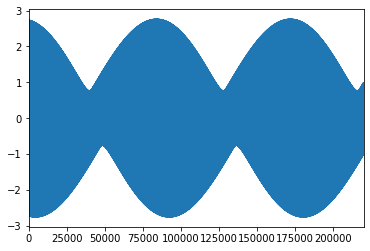

In [3]:
import matplotlib.pyplot as plt

plt.xlim(0, NUM_SAMPLES_PER_SECOND * 5)
plt.plot(tone)

## Discrete Fourier Transform

Here's the code that calculates the Discrete Fourier Transform and plots the frequency spectrum: 

In [4]:
from cmath import pi, exp

def discrete_fourier_transform(x, k):
    omega = 2 * pi * k / (N := len(x))
    return sum(x[n] * exp(-1j * omega * n) for n in range(N))


def plot_frequency_spectrum(
    samples,
    samples_per_second,
    min_frequency=0,
    max_frequency=None,
):
    num_bins = len(samples) // 2
    nyquist_frequency = samples_per_second // 2

    magnitudes = []
    for k in range(num_bins):
        magnitudes.append(abs(discrete_fourier_transform(samples, k)))

    # Normalize magnitudes
    magnitudes = [m / max(magnitudes) for m in magnitudes]

    # Calculate frequency bins
    bin_resolution = samples_per_second / len(samples)
    frequency_bins = [k * bin_resolution for k in range(num_bins)]

    plt.xlim(min_frequency, max_frequency or nyquist_frequency)
    plt.bar(frequency_bins, magnitudes, width=bin_resolution)

Speed up the calculations by taking only a small window of the sound wave:

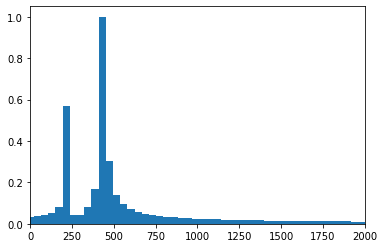

In [5]:
plot_frequency_spectrum(
    tone[:1024],
    NUM_SAMPLES_PER_SECOND,
    max_frequency=2000)